In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#converting xlsx file to csv
df = pd.DataFrame(pd.read_excel("DS - Assignment Part 1 data set.xlsx"))
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [4]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [47]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


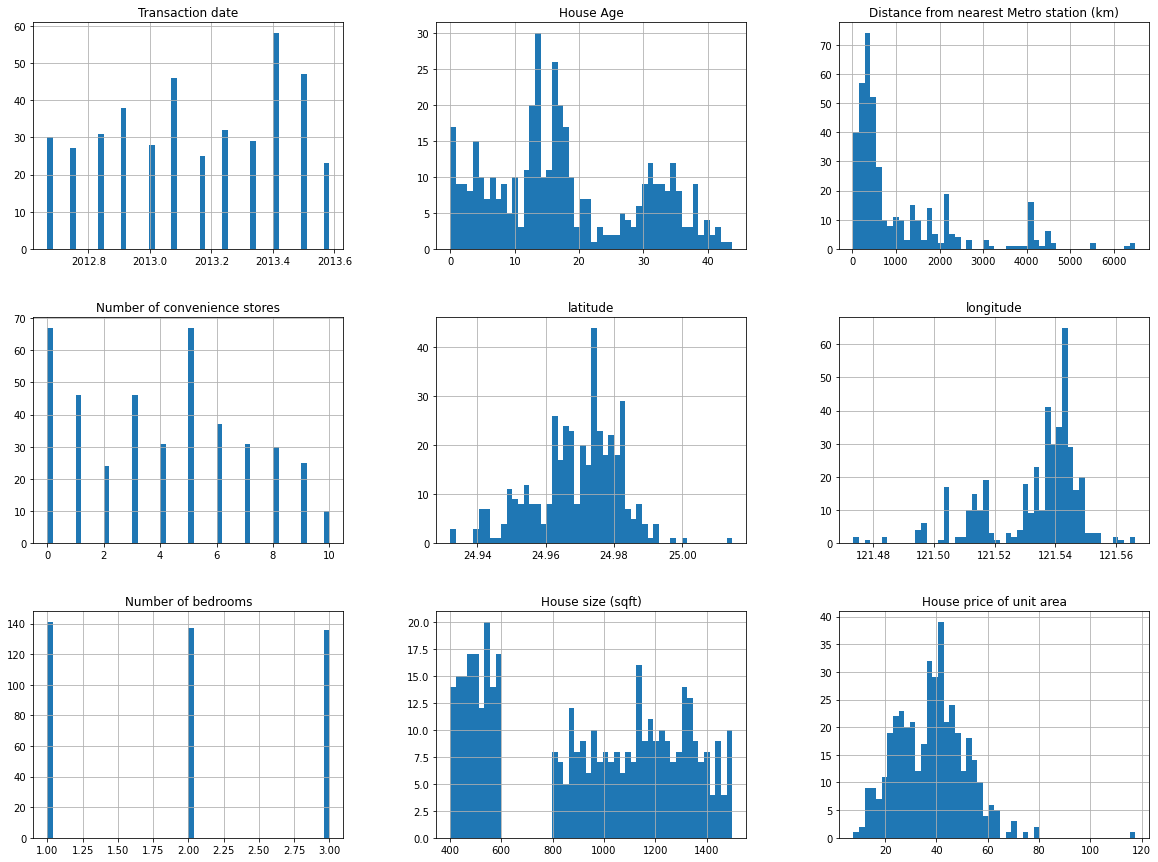

In [48]:
df.hist(bins =50, figsize=(20,15))
plt.show()

<AxesSubplot:>

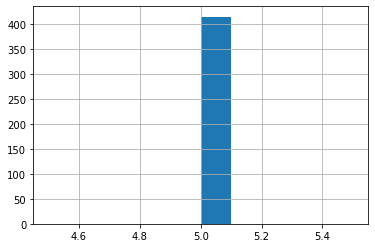

In [49]:
df["income_cat"]=pd.cut(df["House price of unit area"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
df["income_cat"].hist()

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [51]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [52]:
housing = strat_train_set.copy()

In [53]:
corr_matrix = housing.corr()

array([[<AxesSubplot:xlabel='House price of unit area', ylabel='House price of unit area'>,
        <AxesSubplot:xlabel='House size (sqft)', ylabel='House price of unit area'>,
        <AxesSubplot:xlabel='Number of convenience stores', ylabel='House price of unit area'>,
        <AxesSubplot:xlabel='Distance from nearest Metro station (km)', ylabel='House price of unit area'>,
        <AxesSubplot:xlabel='House Age', ylabel='House price of unit area'>],
       [<AxesSubplot:xlabel='House price of unit area', ylabel='House size (sqft)'>,
        <AxesSubplot:xlabel='House size (sqft)', ylabel='House size (sqft)'>,
        <AxesSubplot:xlabel='Number of convenience stores', ylabel='House size (sqft)'>,
        <AxesSubplot:xlabel='Distance from nearest Metro station (km)', ylabel='House size (sqft)'>,
        <AxesSubplot:xlabel='House Age', ylabel='House size (sqft)'>],
       [<AxesSubplot:xlabel='House price of unit area', ylabel='Number of convenience stores'>,
        <AxesSubplot:

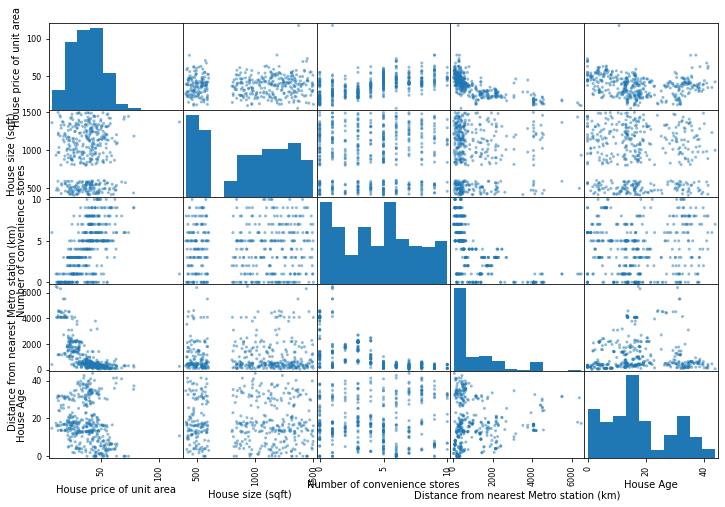

In [54]:
corr_matrix["House price of unit area"].sort_values(ascending=False)

from pandas.plotting import scatter_matrix

attributes = ["House price of unit area", "House size (sqft)", "Number of convenience stores",
              "Distance from nearest Metro station (km)","House Age"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [55]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [56]:
df = strat_train_set.drop("House price of unit area",axis=1)
df_labels = strat_train_set["House price of unit area"].copy()
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
imputer.fit(df)
X = imputer.transform(df)
df_tr = pd.DataFrame(X, columns=df.columns, index = df.index)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
col_names = "House Age","Distance from nearest Metro station (km)","Number of convenience stores","Number of bedrooms","House size (sqft)"
House_age_ix,dist_ix,con_ix,num_be_ix,size_ix = [df.columns.get_loc(c) for c in col_names]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

df_tr = num_pipeline.fit_transform(df)

from sklearn.compose import ColumnTransformer

num_attribs = list(df)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

In [58]:
df_prepared = full_pipeline.fit_transform(df)

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(random_state=42)

In [60]:
from sklearn.metrics import mean_squared_error

df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [61]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=30, random_state=42)
forest_reg.fit(df_prepared, df_labels)

RandomForestRegressor(n_estimators=30, random_state=42)

In [62]:
df_predictions = forest_reg.predict(df_prepared)


forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.7042614785452495

In [63]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [10.86768009  5.97687463 10.53529422  7.11123737  8.36036827  7.78193323
 10.42309499  7.59196146  7.13635592 12.14540691]
Mean: 8.793020708397329
Standard deviation: 1.9336753986090638


In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(df_prepared, df_labels)



grid_search.best_params_

grid_search.best_estimator_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

8.094381487110509 {'max_features': 2, 'n_estimators': 3}
7.075474767717178 {'max_features': 2, 'n_estimators': 10}
6.71125491396558 {'max_features': 2, 'n_estimators': 30}
7.485421662417835 {'max_features': 4, 'n_estimators': 3}
6.8245387990022 {'max_features': 4, 'n_estimators': 10}
6.793285365941781 {'max_features': 4, 'n_estimators': 30}
7.382212963917758 {'max_features': 6, 'n_estimators': 3}
6.954939964156438 {'max_features': 6, 'n_estimators': 10}
6.828703805378517 {'max_features': 6, 'n_estimators': 30}
7.759277997660422 {'max_features': 8, 'n_estimators': 3}
6.954166257727636 {'max_features': 8, 'n_estimators': 10}
6.777672280902488 {'max_features': 8, 'n_estimators': 30}
7.663795170796294 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
7.082205414760374 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
7.693045488745282 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
7.086356946705367 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
7

In [67]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("House price of unit area", axis = 1)
y_test = strat_test_set["House price of unit area"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_mse

97.29194109772425